In [13]:
# import numpy as np
import pandas as pd
# Natural Language Processing
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

import pickle

In [14]:

#DataFrame
df = pd.read_csv('./clean_data.csv')
print(df.shape)
df.tail()
#df = df.drop(columns=['Unnamed: 0'])

(25336, 3)


,Unnamed: 0,subreddit,title
25331,14995,0,cdc urges citizens to avoid spreading coronavi...
25332,14996,0,tito s vodka is warning consumers that it can ...
25333,14997,0,presindent bolsonaro hires comedian to offer b...
25334,14998,0,cops take seized suv for joyride owner tracks ...
25335,14999,0,dead people shot at celebration of life party


In [15]:
X = df['title']
y = df['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    stratify=y)

In [16]:
pipe = Pipeline([('cvec', CountVectorizer()),    
                 ('lr', LogisticRegression(solver='liblinear'))])

# Tune GridSearchCV
pipe_params = {'cvec__ngram_range': [(1,1), (2,2), (1,3)],
               'lr__C': [0.01, 1]}

gs = GridSearchCV(pipe, param_grid=pipe_params, cv=3)
gs.fit(X_train, y_train);
print("Best score:", gs.best_score_)
print("Train score", gs.score(X_train, y_train))
print("Test score", gs.score(X_test, y_test))

Best score: 0.8652247131880855
Train score 0.9977370803073361
Test score 0.8792232396589833


In [12]:
sample=["An exotic dancer in Poland is a stripper Pole on a stripper pole"]
pred = gs.predict(sample)
print(pred)

[0]


In [5]:
pickle.dump(gs, open('LR.pkl', 'wb'))


cv = CountVectorizer()
cv.fit(X_train)
X_train = cv.transform(X_train)
X_test = cv.transform(X_test)
X_train
classifier = MultinomialNB()
classifier.fit(X_train,y_train)
score = classifier.score(X_test,y_test)
print("Accuracy:",score)

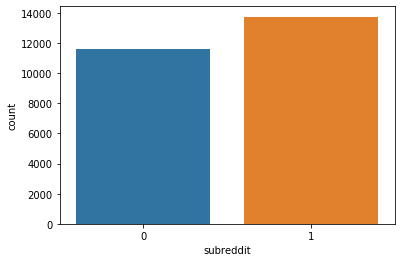

In [18]:
import seaborn as sns
sns.countplot(x='subreddit', data=df)